In [1]:
import pandas as pd   # pandas library for data manipulation and analysis
import numpy as np   #  numpy library for numerical computations

%matplotlib inline  # magic command %matplotlib inline enables the drawing of matplotlib figures


# 1. Import Data

In [2]:
taxi_df = pd.read_csv(r'C:\Users\Hatice Aydoğmuş\Desktop\Python works\yellow_tripdata_2019-01.csv')

In [3]:
taxi_jan_19 = taxi_df

In [4]:
taxi_jan_19.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN,NaN
1,1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN,NaN
2,2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN,NaN
3,3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN,NaN
4,4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN,NaN


In [5]:
print(taxi_jan_19.shape)

(7696617, 20)


In [6]:
taxi_data = pd.concat([taxi_jan_19]) # other months can be added in the future

# 2. Data Exploration

In [7]:
taxi_data.columns

Index(['Unnamed: 0', 'VendorID', 'tpep_pickup_datetime',
       'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
       'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [8]:
# assessing attributes by looking data dictionary, then selecting useful columns for the project
taxi_data = taxi_data[['tpep_pickup_datetime','tpep_dropoff_datetime','passenger_count','trip_distance','RatecodeID','PULocationID',
             'DOLocationID','payment_type','total_amount']]

In [9]:
taxi_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,151,239,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,239,246,1,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,236,236,1,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,193,193,2,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,193,193,2,55.55


array([[<Axes: title={'center': 'passenger_count'}>,
        <Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'RatecodeID'}>],
       [<Axes: title={'center': 'PULocationID'}>,
        <Axes: title={'center': 'DOLocationID'}>,
        <Axes: title={'center': 'payment_type'}>],
       [<Axes: title={'center': 'total_amount'}>, <Axes: >, <Axes: >]],
      dtype=object)

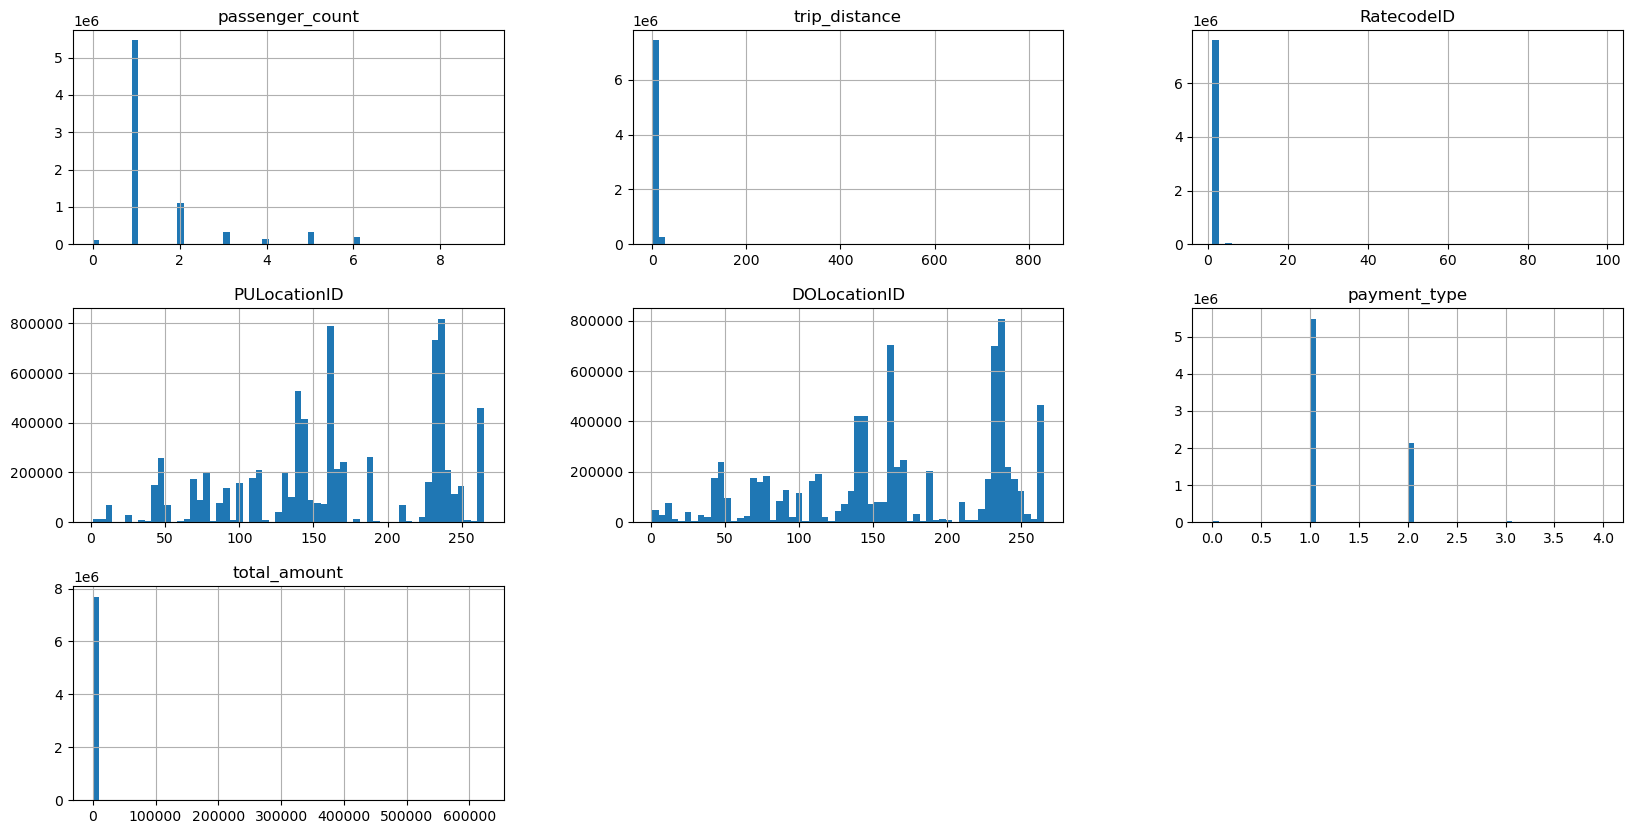

In [10]:
# Exploring with Histograms
taxi_data.hist(figsize=(20,10),bins=60)

In [11]:
# This helps in understanding the distribution of different rate codes used in the taxi rides
taxi_data['RatecodeID'].value_counts()

1.0     7430288
2.0      166093
5.0       54570
3.0       11801
4.0        4895
99.0        252
6.0          46
Name: RatecodeID, dtype: int64

C:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='index', ylabel='total_amount'>

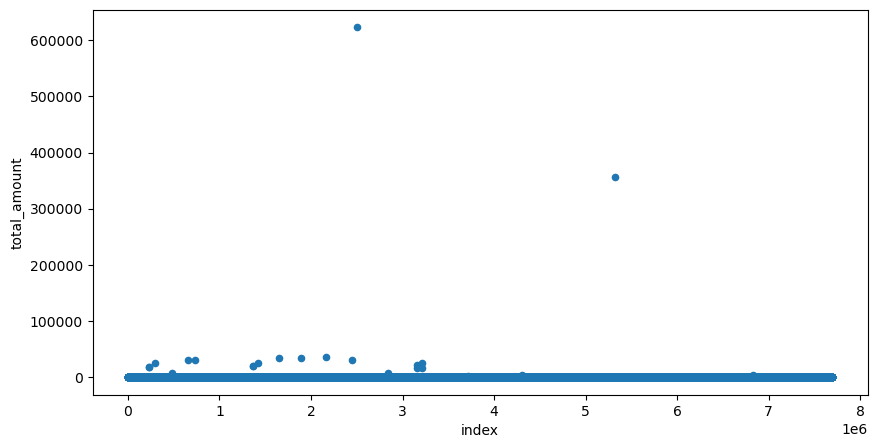

In [12]:
taxi_data.reset_index().plot(kind='scatter', y='total_amount', x='index',figsize = (10,5) )

C:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='index', ylabel='total_amount'>

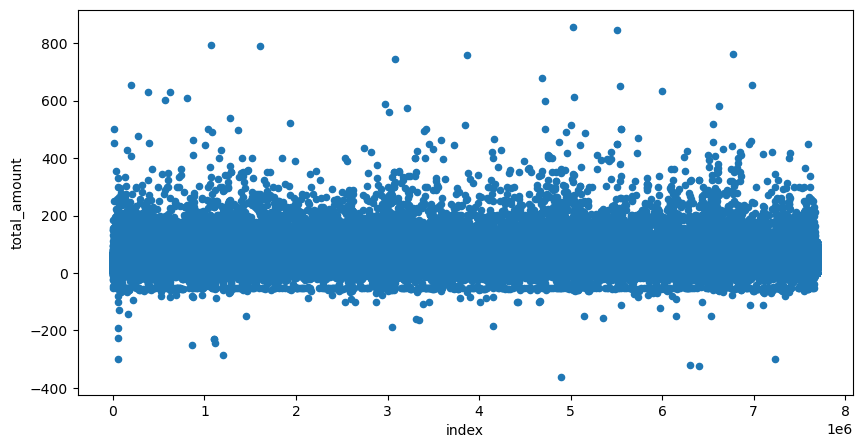

In [13]:
taxi_data[taxi_data['total_amount']<1000].reset_index().plot(kind='scatter', y='total_amount', x='index', figsize= (10,5))

Two things to deal with: negative values and very high values.

In [14]:
print(taxi_data[taxi_data['total_amount']<0].shape)

(7127, 9)


C:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='index', ylabel='total_amount'>

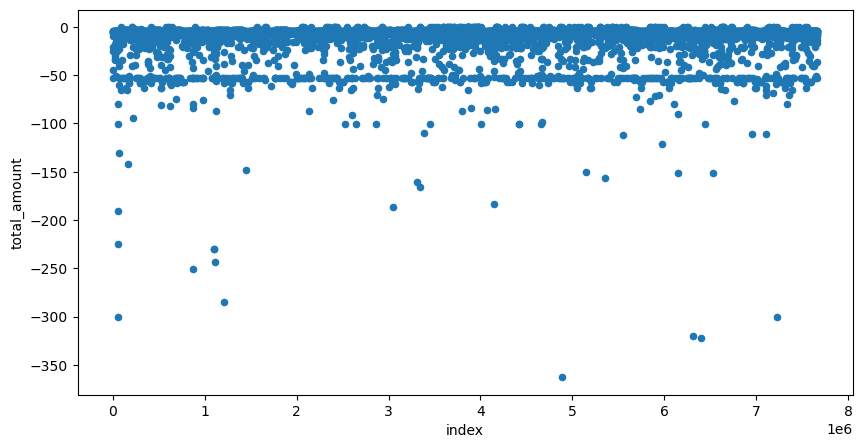

In [15]:
taxi_data[taxi_data['total_amount']<0].reset_index().plot(kind='scatter', y='total_amount', x='index', figsize= (10,5))

In [16]:
taxi_data[taxi_data['total_amount']<0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
663,2019-01-01 00:32:56,2019-01-01 00:33:35,2.0,0.10,1.0,148,148,3,-3.8
2402,2019-01-01 00:14:18,2019-01-01 00:40:55,1.0,4.13,1.0,170,238,4,-20.3
2541,2019-01-01 00:31:27,2019-01-01 00:42:39,1.0,1.35,1.0,162,234,4,-9.8
2544,2019-01-01 00:45:57,2019-01-01 00:46:07,1.0,0.00,1.0,234,234,4,-3.8
2547,2019-01-01 00:48:35,2019-01-01 00:49:59,1.0,0.16,1.0,234,234,4,-4.3


In [17]:
taxi_data[taxi_data['total_amount']<0]['payment_type'].value_counts()

3    4083
4    2667
2     376
1       1
Name: payment_type, dtype: int64

<Axes: >

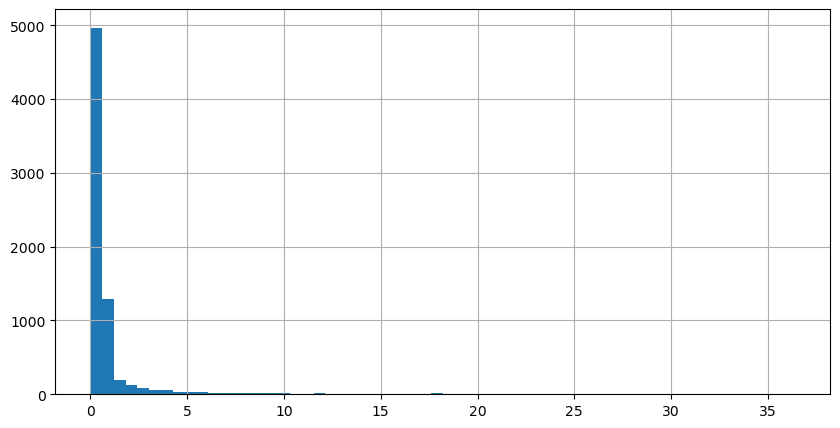

In [18]:
taxi_data[taxi_data['total_amount']<0]['trip_distance'].hist(bins=60, figsize= (10,5))

In [19]:
print(taxi_data[taxi_data['total_amount']==0].shape)

(1643, 9)


In [20]:
taxi_data[taxi_data['total_amount']==0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
3552,2019-01-01 00:18:46,2019-01-01 00:18:46,1.0,0.0,5.0,186,264,2,0.0
9138,2019-01-01 00:41:47,2019-01-01 00:41:47,1.0,0.0,5.0,246,264,2,0.0
13256,2019-01-01 00:19:38,2019-01-01 00:20:35,1.0,0.0,1.0,193,193,1,0.0
13257,2019-01-01 00:43:34,2019-01-01 00:43:34,1.0,0.0,1.0,7,7,2,0.0
13258,2019-01-01 00:02:52,2019-01-01 00:02:52,1.0,0.0,1.0,264,7,2,0.0


In [21]:
taxi_data[taxi_data['total_amount']==0]['payment_type'].value_counts()

1    813
2    569
0    231
3     29
4      1
Name: payment_type, dtype: int64

<Axes: >

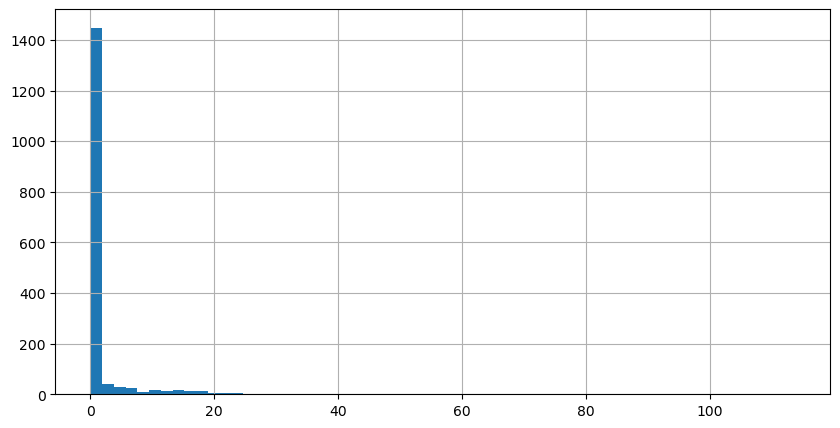

In [22]:
taxi_data[taxi_data['total_amount']==0]['trip_distance'].hist(bins=60, figsize= (10,5))

In [23]:
taxi_data[taxi_data['total_amount']==0]['trip_distance'].value_counts()

0.00     1323
0.03        9
0.01        8
0.06        6
1.00        4
         ... 
11.86       1
4.59        1
20.92       1
18.37       1
12.30       1
Name: trip_distance, Length: 256, dtype: int64

We can safely get rid of negative values. What about high values?

C:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='index', ylabel='total_amount'>

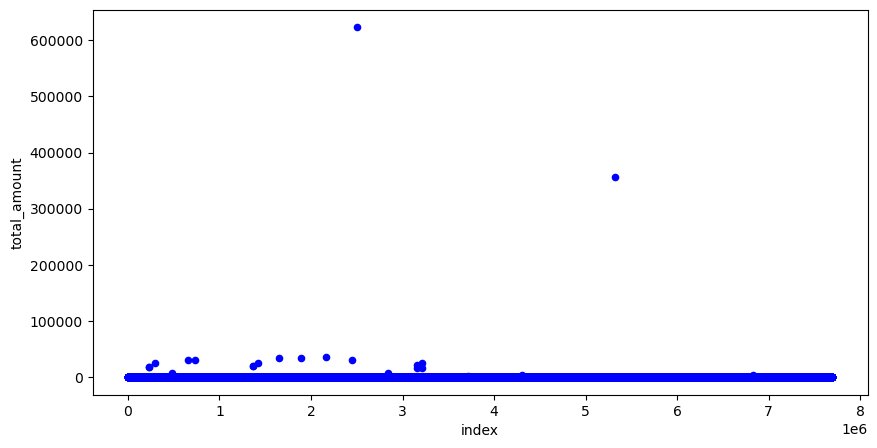

In [24]:
taxi_data.reset_index().plot(kind='scatter', y='total_amount', x='index', figsize= (10,5), color='blue')

In [25]:
taxi_data[taxi_data['total_amount']>200].shape

(1166, 9)

In [26]:
taxi_data['total_amount'].mean()

15.81065134371489

We can agree to cut from $200 level

# 3. Data Cleanning

In [27]:
# This filters out rides where 'total_amount' is greater than 0 and less than 200
# This helps to exclude invalid or outlier fare amounts such as negative fares or extremely high values
taxi_data_filtered = taxi_data[(taxi_data['total_amount']>0)&(taxi_data['total_amount']<200)]

In [28]:
print(taxi_data.shape)

(7696617, 9)


In [29]:
print(taxi_data_filtered.shape)

(7686676, 9)


Checking for missing values

In [30]:
 taxi_data_filtered.isna().sum()

tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          28441
trip_distance                0
RatecodeID               28441
PULocationID                 0
DOLocationID                 0
payment_type                 0
total_amount                 0
dtype: int64

Fill missing values with a default or statistical value

In [31]:
taxi_data_filtered = taxi_data_filtered.copy()  # Make a copy of the DataFrame
taxi_data_filtered['passenger_count'] = taxi_data_filtered['passenger_count'].fillna(taxi_data_filtered['passenger_count'].mean())
taxi_data_filtered['RatecodeID'] = taxi_data_filtered['RatecodeID'].fillna(taxi_data_filtered['RatecodeID'].mean())

# 4.Data Preparation

In [32]:
taxi_data_prepared = taxi_data_filtered.copy()

Making sure everything is in the right type

In [33]:
taxi_data_prepared.dtypes 

tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
PULocationID               int64
DOLocationID               int64
payment_type               int64
total_amount             float64
dtype: object

In [34]:
# Converting the 'tpep_pickup_datetime' and 'tpep_dropoff_datetime' columns to datetime format 
taxi_data_prepared.loc[:, 'tpep_pickup_datetime'] = pd.to_datetime(taxi_data_prepared.loc[:, 'tpep_pickup_datetime'])
taxi_data_prepared.loc[:, 'tpep_dropoff_datetime'] = pd.to_datetime(taxi_data_prepared.loc[:, 'tpep_dropoff_datetime'])

In [35]:
# Converting 'PULocationID', 'DOLocationID', 'RatecodeID', and 'payment_type' columns to string type
# This treats these columns as categorical data (since they represent location IDs, rate codes, and payment methods)
# rather than numerical values, which is more appropriate for analysis
taxi_data_prepared.loc[:, 'PULocationID'] = taxi_data_prepared['PULocationID'].astype(str)
taxi_data_prepared.loc[:, 'DOLocationID'] = taxi_data_prepared['DOLocationID'].astype(str)
taxi_data_prepared.loc[:, 'RatecodeID'] = taxi_data_prepared['RatecodeID'].astype(str)
taxi_data_prepared.loc[:, 'payment_type'] = taxi_data_prepared['payment_type'].astype(str)

In [36]:
taxi_data_prepared.dtypes 

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                       object
PULocationID                     object
DOLocationID                     object
payment_type                     object
total_amount                    float64
dtype: object

Transforming variables into the formats we need them

In [37]:
taxi_data_prepared['transaction_date'] = pd.to_datetime(taxi_data_prepared['tpep_pickup_datetime'].dt.date)

taxi_data_prepared['transaction_year'] = taxi_data_prepared['tpep_pickup_datetime'].dt.year
taxi_data_prepared['transaction_month'] = taxi_data_prepared['tpep_pickup_datetime'].dt.month
taxi_data_prepared['transaction_day'] = taxi_data_prepared['tpep_pickup_datetime'].dt.day
taxi_data_prepared['transaction_hour'] = taxi_data_prepared['tpep_pickup_datetime'].dt.hour

In [38]:
taxi_data_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,151,239,1,9.95,2019-01-01,2019,1,1,0
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,239,246,1,16.30,2019-01-01,2019,1,1,0
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,236,236,1,5.80,2018-12-21,2018,12,21,13
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,193,193,2,7.55,2018-11-28,2018,11,28,15
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,193,193,2,55.55,2018-11-28,2018,11,28,15


array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'total_amount'}>,
        <Axes: title={'center': 'transaction_date'}>],
       [<Axes: title={'center': 'transaction_year'}>,
        <Axes: title={'center': 'transaction_month'}>,
        <Axes: title={'center': 'transaction_day'}>],
       [<Axes: title={'center': 'transaction_hour'}>, <Axes: >, <Axes: >]],
      dtype=object)

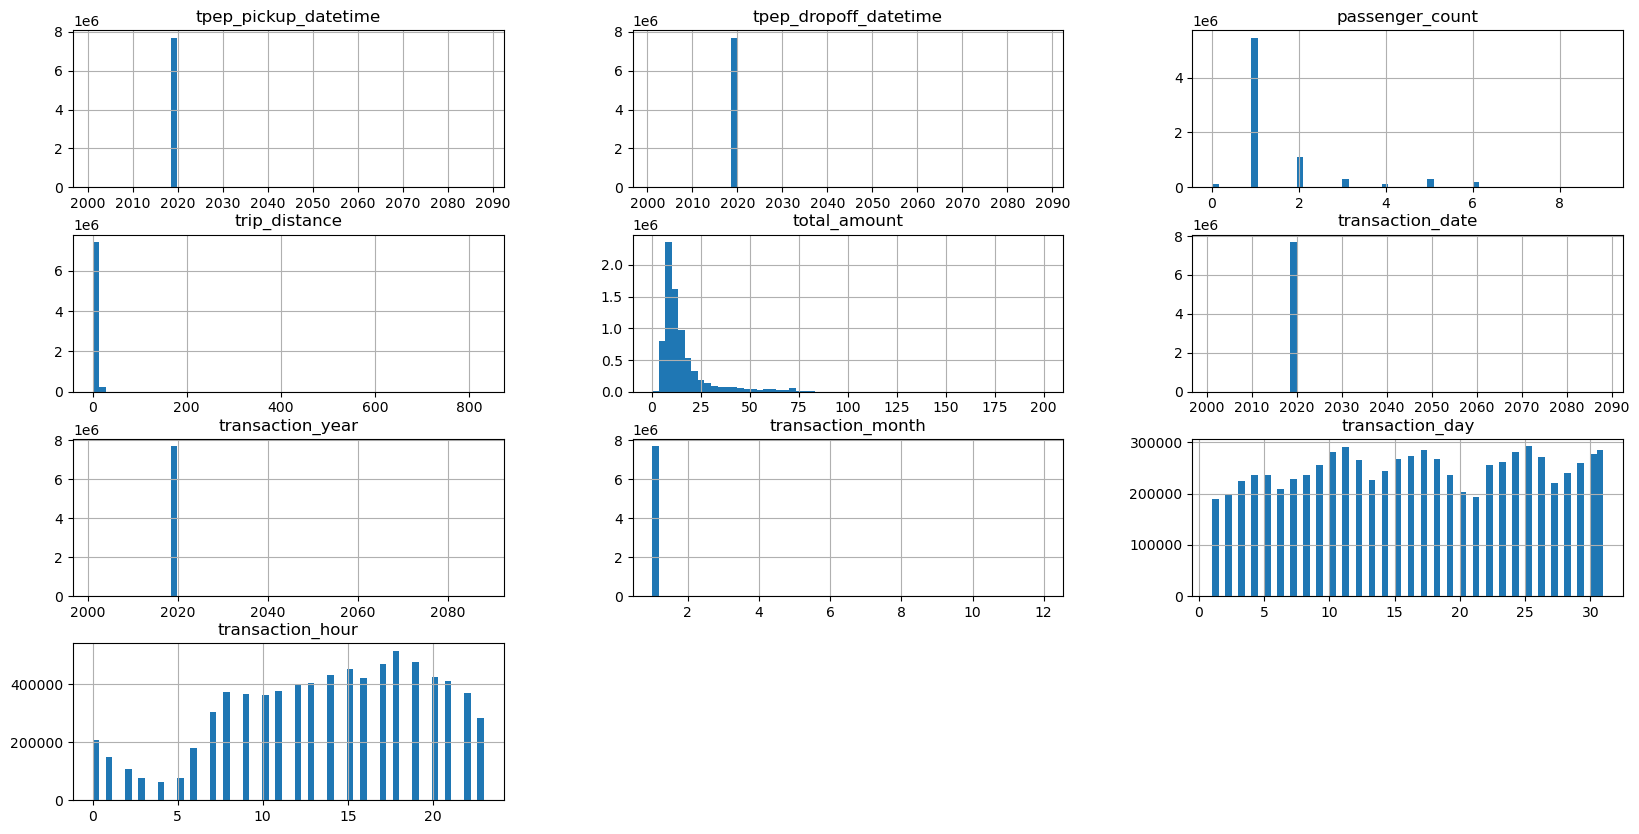

In [39]:
taxi_data_prepared.hist(figsize=(20,10), bins=60)

In [40]:
# This narrows down the data to rides that occurred in January 2019.
taxi_data_prepared = taxi_data_prepared[taxi_data_prepared['transaction_year']==2019]
taxi_data_prepared = taxi_data_prepared[taxi_data_prepared['transaction_month']==1]

In [41]:
taxi_data_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,151,239,1,9.95,2019-01-01,2019,1,1,0
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,239,246,1,16.30,2019-01-01,2019,1,1,0
7,2019-01-01 00:21:28,2019-01-01 00:28:37,1.0,1.3,1.0,163,229,1,9.05,2019-01-01,2019,1,1,0
8,2019-01-01 00:32:01,2019-01-01 00:45:39,1.0,3.7,1.0,229,7,1,18.50,2019-01-01,2019,1,1,0
9,2019-01-01 00:57:32,2019-01-01 01:09:32,2.0,2.1,1.0,141,234,1,13.00,2019-01-01,2019,1,1,0


Noting down categorical and numerical columns 

In [42]:
categorical_columns = ['PULocationID','transaction_date','transaction_month','transaction_day','transaction_hour']
numerical_columns = ['trip_distance', 'total_amount']

In [43]:
all_needed_columns = categorical_columns + numerical_columns

In [44]:
main_taxi_df = taxi_data_prepared[all_needed_columns]
print(main_taxi_df.shape)
main_taxi_df.head()

(7686144, 7)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount
0,151,2019-01-01,1,1,0,1.5,9.95
1,239,2019-01-01,1,1,0,2.6,16.30
7,163,2019-01-01,1,1,0,1.3,9.05
8,229,2019-01-01,1,1,0,3.7,18.50
9,141,2019-01-01,1,1,0,2.1,13.00


Aggregate data points 

In [45]:
taxi_grouped_by_region = main_taxi_df.groupby(categorical_columns).mean().reset_index()
taxi_grouped_by_region['count_of_transactions'] = main_taxi_df.groupby(categorical_columns).count().reset_index()['total_amount']
print(taxi_grouped_by_region.shape)
taxi_grouped_by_region.head()

(102678, 8)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2019-01-01,1,1,2,0.0,21.800,1
1,1,2019-01-01,1,1,5,0.0,87.300,1
2,1,2019-01-01,1,1,6,0.0,80.300,1
3,1,2019-01-01,1,1,8,0.0,128.580,2
4,1,2019-01-01,1,1,10,16.9,43.245,4


<Axes: >

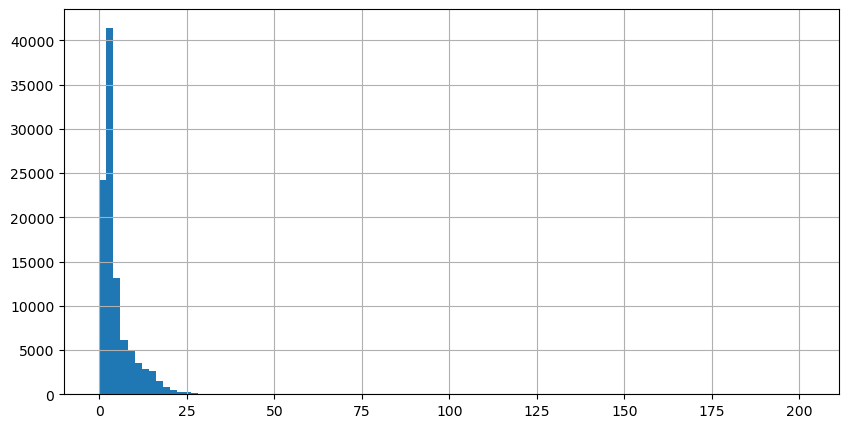

In [46]:
taxi_grouped_by_region['trip_distance'].hist(bins=100, figsize=(10,5))

<Axes: >

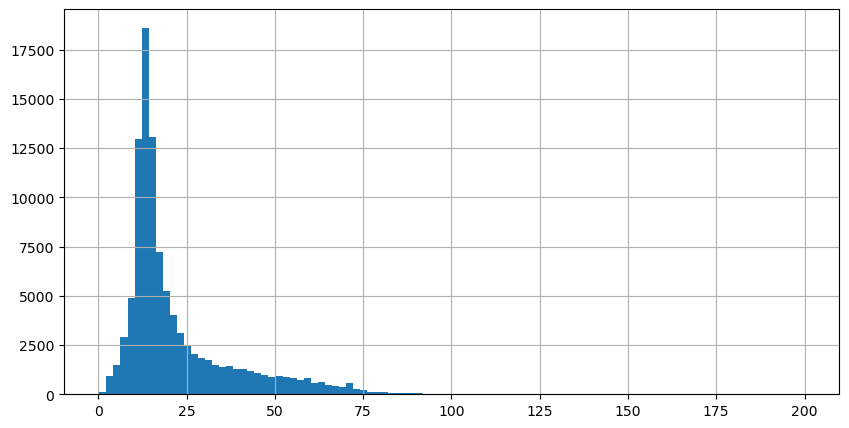

In [47]:
taxi_grouped_by_region['total_amount'].hist(bins=100, figsize=(10,5))

# 5. Benchmark Model

In [48]:
data_for_benchmark_model = taxi_grouped_by_region.copy()

In [49]:
categorical_features_benchmark = ['PULocationID','transaction_month', 'transaction_day', 'transaction_hour']
input_features_benchmark = categorical_features_benchmark + ['trip_distance']
target_feature_benchmark = 'total_amount'   #feature we are predicting

## 5.1. Train-test Split

In [50]:
from sklearn.model_selection import train_test_split

X_bench = data_for_benchmark_model[input_features_benchmark]
y_bench = data_for_benchmark_model[target_feature_benchmark]

# one-hot encode 
X_bench = pd.get_dummies(X_bench)

X_train_b, X_test_b, y_train_b, y_test_b, = train_test_split(X_bench, y_bench, test_size = 0.33, random_state = 42 )

## 5.2. Fit a Model to the Data

In [51]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth = 10)
tree.fit(X_train_b, y_train_b)

DecisionTreeRegressor(max_depth=10)

## 5.3. Model Evaluation

In [52]:
model_at_hand = tree

y_pred_b = model_at_hand.predict(X_test_b)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_abolute_error', mean_absolute_error(y_test_b, y_pred_b))
print('mean_squared_error', mean_squared_error(y_test_b, y_pred_b))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test_b, y_pred_b)))
print('r2', r2_score(y_test_b, y_pred_b))

mean_abolute_error 3.395774935178919
mean_squared_error 60.05597729960738
root_mean_squared_error 7.749579169194117
r2 0.792449920449547


C:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='true', ylabel='pred'>

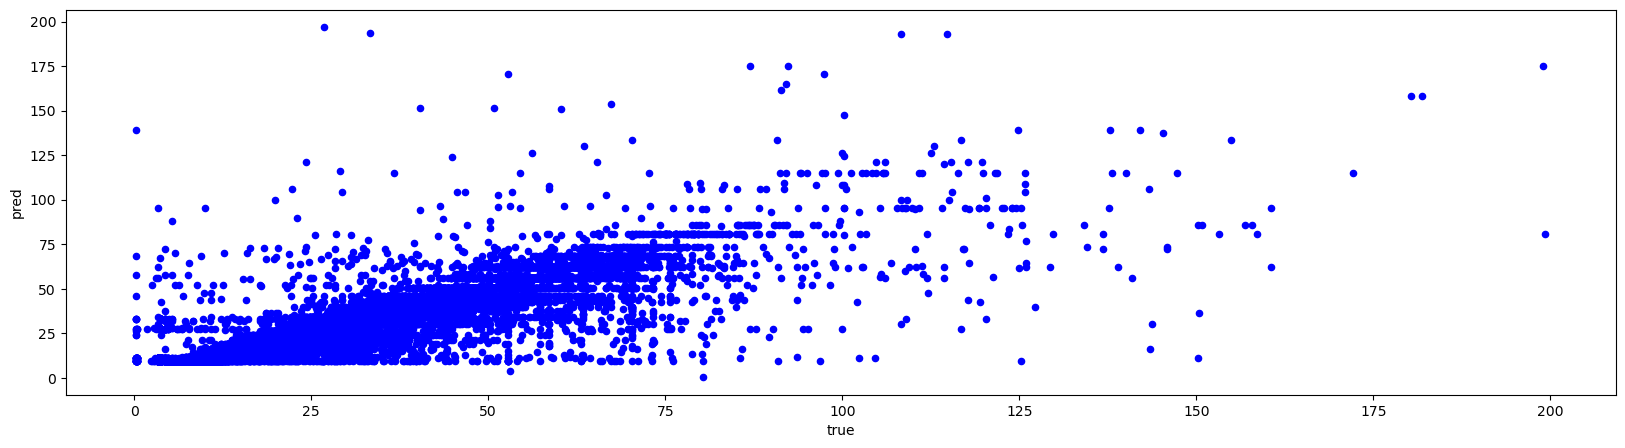

In [53]:
data = {'true': y_test_b, 'pred': y_pred_b}
results = pd.DataFrame(data)

results.plot(figsize = (20,5), kind = 'scatter', x='true', y='pred', color='blue')

This model looks too good to be true. Trip distance and total amount are positively correlated.
so, trip distance should not be affecting the target prediction..

## 5.4. Fix Problems

In [54]:
categorical_features_benchmark = ['PULocationID','transaction_month', 'transaction_day', 'transaction_hour']
input_features_benchmark = categorical_features_benchmark 
target_feature_benchmark = 'total_amount'   #feature we are predicting

#train and test split
from sklearn.model_selection import train_test_split

X_bench = data_for_benchmark_model[input_features_benchmark]
y_bench = data_for_benchmark_model[target_feature_benchmark]

# one-hot encode 
X_bench = pd.get_dummies(X_bench)

X_train_b, X_test_b, y_train_b, y_test_b, = train_test_split(X_bench, y_bench, test_size = 0.33, random_state = 42 )


#fit a model
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth = 10)
tree.fit(X_train_b, y_train_b)

#evaluate model
model_at_hand = tree

y_pred_b = model_at_hand.predict(X_test_b)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_abolute_error', mean_absolute_error(y_test_b, y_pred_b))
print('mean_squared_error', mean_squared_error(y_test_b, y_pred_b))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test_b, y_pred_b)))
print('r2', r2_score(y_test_b, y_pred_b))



mean_abolute_error 10.702872358153623
mean_squared_error 238.6856201290138
root_mean_squared_error 15.449453716200253
r2 0.17511592229721518


C:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='true', ylabel='pred'>

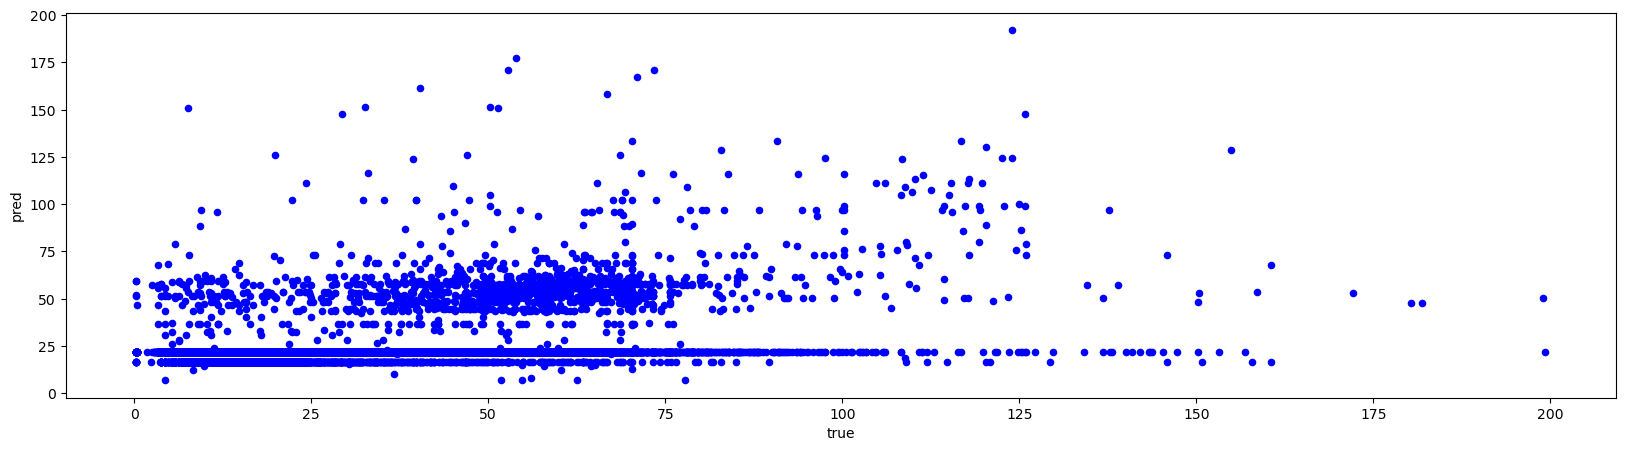

In [55]:
data = {'true': y_test_b, 'pred': y_pred_b}
results = pd.DataFrame(data)

results.plot(figsize = (20,5), kind = 'scatter', x='true', y='pred', color='blue')

# 6. Feature Engineering

In [56]:
taxi_grouped_by_region.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2019-01-01,1,1,2,0.0,21.800,1
1,1,2019-01-01,1,1,5,0.0,87.300,1
2,1,2019-01-01,1,1,6,0.0,80.300,1
3,1,2019-01-01,1,1,8,0.0,128.580,2
4,1,2019-01-01,1,1,10,16.9,43.245,4


In [57]:
data_with_new_features = taxi_grouped_by_region.copy()

### Date related features

In [58]:
# Adding two new columns to the 'data_with_new_features' DataFrame:
# 1. 'transaction_week_day': Extracts the day of the week from 'transaction_date' (0=Monday, 6=Sunday).
# 2. 'weekend': Flags whether the day is a weekend (Saturday or Sunday) by applying a lambda function 
# that assigns True for days 5 and 6 (Saturday and Sunday), and False otherwise.
data_with_new_features['transaction_week_day'] = data_with_new_features['transaction_date'].dt.weekday
data_with_new_features['weekend'] = data_with_new_features['transaction_week_day'].apply(lambda x: True if x == 5 or x == 6 else False)

In [59]:
# Importing the USFederalHolidayCalendar to get US federal holidays
# Creating an instance of the calendar and generating a list of holidays between 2018 and 2020
# Adding a new column 'is_holiday' to the 'data_with_new_features' DataFrame
# This column is True if 'transaction_date' is one of the federal holidays, and False otherwise
from pandas.tseries.holiday import USFederalHolidayCalendar

cal = USFederalHolidayCalendar()
holidays = cal.holidays(start='2018',
                        end='2020').date
data_with_new_features['is_holiday'] = data_with_new_features['transaction_date'].isin(holidays)

In [60]:
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,True
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,True
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,True
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,True
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,True


### Borough Information

In [61]:
zone_lookup = pd.read_csv('taxi_zone_lookup.csv')

In [62]:
zone_lookup = zone_lookup[['LocationID','Borough']]
zone_lookup['LocationID'] = zone_lookup['LocationID'].astype(str)  ## Converting the 'LocationID' column to string type for consistency in data handling
zone_lookup.head()

,LocationID,Borough
0,1,EWR
1,2,Queens
2,3,Bronx
3,4,Manhattan
4,5,Staten Island


In [63]:
data_with_new_features = data_with_new_features.merge(zone_lookup, left_on='PULocationID', right_on='LocationID', how='left')
data_with_new_features.drop('LocationID', axis=1, inplace=True)
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,True,EWR
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,True,EWR
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,True,EWR
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,True,EWR
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,True,EWR


In [64]:
data_with_new_features['Borough'].value_counts()

Manhattan        45315
Brooklyn         23720
Queens           21969
Bronx             9647
Unknown            744
Staten Island      304
EWR                270
Name: Borough, dtype: int64

# 7. Model Training

In [65]:
data_for_model = data_with_new_features.copy()

In [97]:
# Defining lists of features for the model
categorical_features = ['PULocationID', 'transaction_month', 'transaction_day',
       'transaction_hour', 'transaction_week_day', 'weekend', 'is_holiday', 'Borough']
input_features = categorical_features 
target_feature = 'total_amount'

### train-test split 

In [67]:
from sklearn.model_selection import train_test_split

X = data_for_model[input_features]
y = data_for_model[target_feature]

# one-hot encode
X = pd.get_dummies(X)

# Splitting the data into training and testing sets
# 33% of the data is used for testing and 67% for training
# Setting a random seed (42) for reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# 7.1. Decision Trees

In [68]:
from sklearn.tree import DecisionTreeRegressor 

# Initializing the DecisionTreeRegressor model with a maximum depth of 10
decision_tree = DecisionTreeRegressor(max_depth=10)

# Fitting the DecisionTreeRegressor model to the training data
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [69]:
model_at_hand = decision_tree

# Making predictions on the test set using the trained DecisionTreeRegressor model
y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

# Evaluating the model's performance on the test set 
print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

mean_absolute_error 8.943216037302665
mean_squared_error 202.16075222087792
root_mean_squared_error 14.218324522280321
r2 0.30134381135619404


C:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='true', ylabel='pred'>

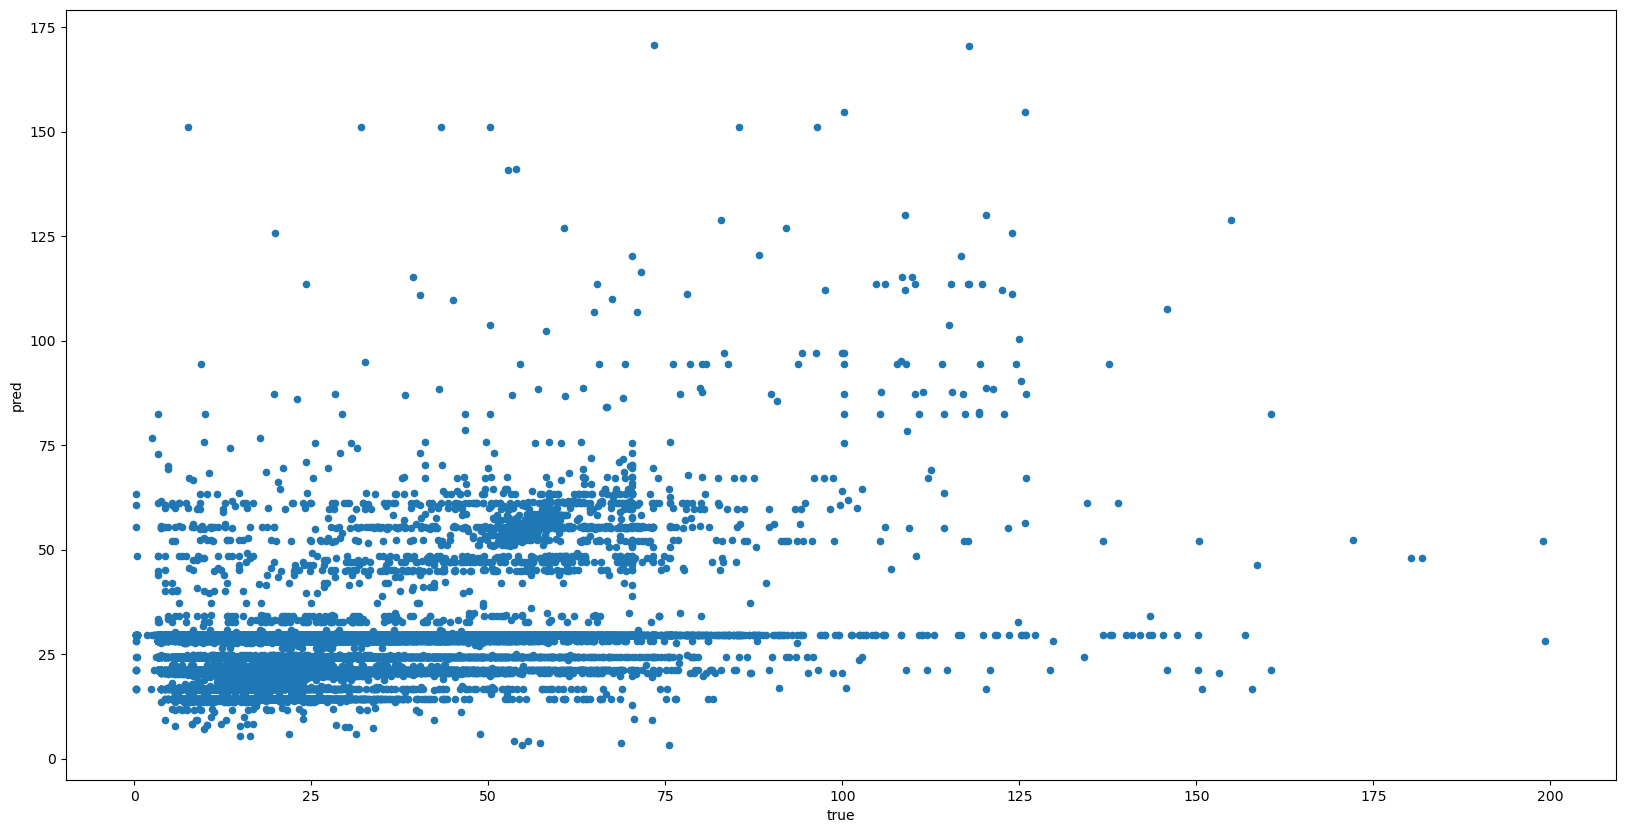

In [70]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

# Plotting a scatter plot to visualize the relationship between the true values and the predicted values
results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

The model fits the training data's pattern so much that it loses the ability to generalise.

In [71]:
X_train_overfit = X_train
y_train_overfit = y_train

X_test_overfit = X_test
y_test_overfit = y_test

In [72]:
# Initializing a dictionary to store RMSE scores for different 'max_depth' values
rmse_scores = {'max_depth':[] ,'rmse_train':[], 'rmse_test':[]}

# Looping over a range of 'max_depth' values to evaluate the performance of DecisionTreeRegressor
for md in [2, 5, 8, 10, 15, 20, 30, 50, 70, 100, 150]:
    print(md)
    decision_tree_overfit = DecisionTreeRegressor(max_depth=md)
    decision_tree_overfit.fit(X_train_overfit, y_train_overfit)
    
    model_at_hand_overfit = decision_tree_overfit
    
    y_pred_train = model_at_hand_overfit.predict(X_train_overfit)
    rmse_train = sqrt(mean_squared_error(y_train_overfit, y_pred_train))
    
    y_pred_test = model_at_hand_overfit.predict(X_test_overfit)
    rmse_test = sqrt(mean_squared_error(y_test_overfit, y_pred_test))
    
    rmse_scores['max_depth'].append(md)
    rmse_scores['rmse_train'].append(rmse_train)
    rmse_scores['rmse_test'].append(rmse_test)

2
5
8
10
15
20
30
50
70
100
150


In [73]:
pd.DataFrame.from_dict(rmse_scores)

,max_depth,rmse_train,rmse_test
0,2,1.549357e+01,15.286123
1,5,1.472069e+01,14.615945
2,8,1.416943e+01,14.287201
3,10,1.379250e+01,14.220113
4,15,1.268631e+01,14.512380
5,20,1.177364e+01,14.689118
6,30,1.021429e+01,15.162131
7,50,6.679707e+00,16.795429
8,70,2.440096e+00,17.869193
9,100,3.373574e-17,18.051486


Text(0, 0.5, 'root mean squared error')

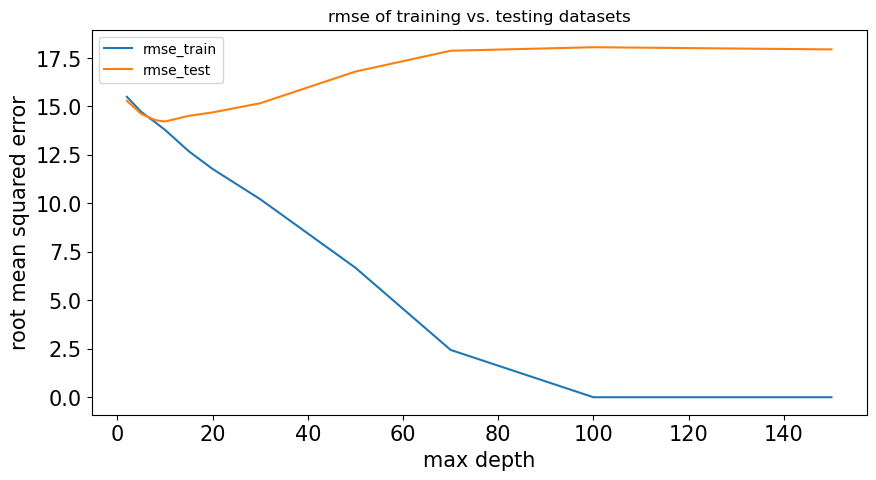

In [74]:
ax = pd.DataFrame.from_dict(rmse_scores).plot(figsize=(10,5),title="rmse of training vs. testing datasets", fontsize=15, x='max_depth')
ax.set_xlabel("max depth", fontsize=15)
ax.set_ylabel("root mean squared error", fontsize=15)

### Underfit


Underfit is when the model cannot capture the data's pattern at all

In [75]:
X_train_underfit = X_train
y_train_underfit = y_train

X_test_underfit = X_test
y_test_underfit = y_test

In [76]:
decision_tree_underfit = DecisionTreeRegressor(max_depth=1)
decision_tree_underfit.fit(X_train_underfit, y_train_underfit)

# Training performance

model_at_hand_underfit = decision_tree_underfit

y_pred_underfit = model_at_hand_underfit.predict(X_train_underfit)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_train_underfit, y_pred_underfit))
print('mean_squared_error', mean_squared_error(y_train_underfit, y_pred_underfit))
print('root_mean_squared_error', sqrt(mean_squared_error(y_train_underfit, y_pred_underfit)))
print('r2', r2_score(y_train_underfit, y_pred_underfit))

mean_absolute_error 10.495114148254716
mean_squared_error 256.96190380838846
root_mean_squared_error 16.03003131027474
r2 0.13971199784488042


In [77]:
# Testing performance

y_pred_underfit = model_at_hand_underfit.predict(X_test_underfit)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test_underfit, y_pred_underfit))
print('mean_squared_error', mean_squared_error(y_test_underfit, y_pred_underfit))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test_underfit, y_pred_underfit)))
print('r2', r2_score(y_test_underfit, y_pred_underfit))

mean_absolute_error 10.443568527424352
mean_squared_error 248.55487171612847
root_mean_squared_error 15.765623099520313
r2 0.14100834393261374


# 7.2. Random Forest

In [78]:
from sklearn.ensemble import RandomForestRegressor

# Initializing the RandomForestRegressor model
rando_model = RandomForestRegressor()

# Fitting the RandomForestRegressor model to the training data
rando_model.fit(X_train, y_train)

RandomForestRegressor()

In [79]:
# Assigning the trained RandomForestRegressor model to a variable for further use
model_at_hand = rando_model

# Making predictions on the test set using the trained RandomForestRegressor model
y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

# Evaluating the model's performance on the test set
print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

mean_absolute_error 7.738281270375955
mean_squared_error 182.6057646871263
root_mean_squared_error 13.513170045815539
r2 0.368924748354197


C:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='true', ylabel='pred'>

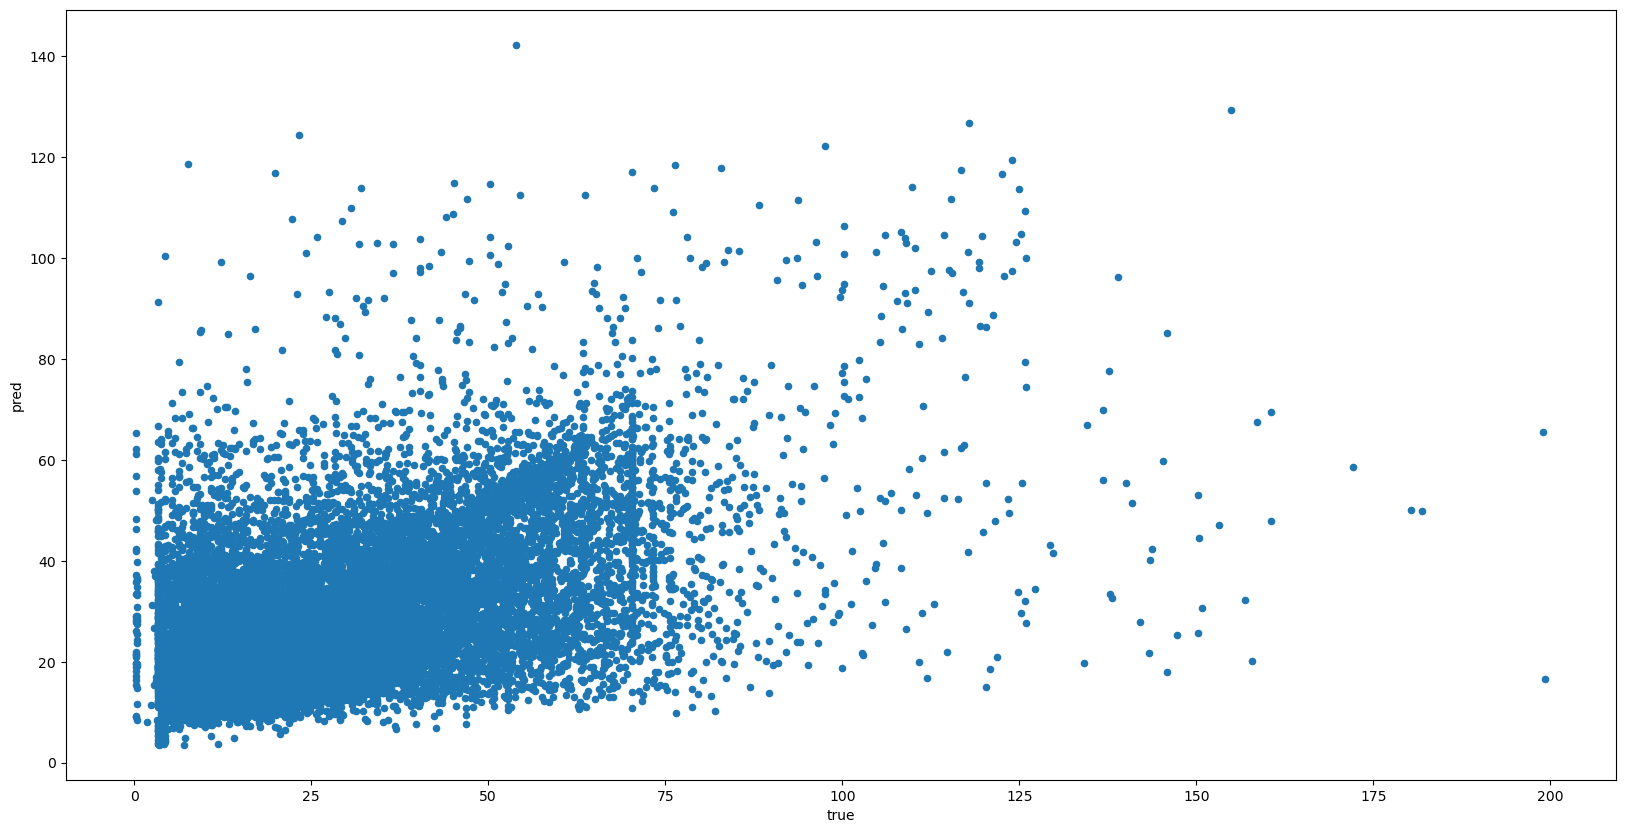

In [80]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

# Plotting a scatter plot to visualize the relationship between true values and predicted values
results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

# 7.3. Gradient Boosting

In [81]:
from sklearn.ensemble import GradientBoostingRegressor

# Initializing the GradientBoostingRegressor model
gradBooster = GradientBoostingRegressor()

# Fitting the GradientBoostingRegressor model to the training data
gradBooster.fit(X_train, y_train)

GradientBoostingRegressor()

In [82]:
model_at_hand = gradBooster

# Making predictions on the test set using the trained GradientBoostingRegressor model
y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

# Evaluating the model's performance on the test set 
print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

mean_absolute_error 8.786863626004358
mean_squared_error 183.63699562434738
root_mean_squared_error 13.551272841484204
r2 0.3653608722392957


C:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='true', ylabel='pred'>

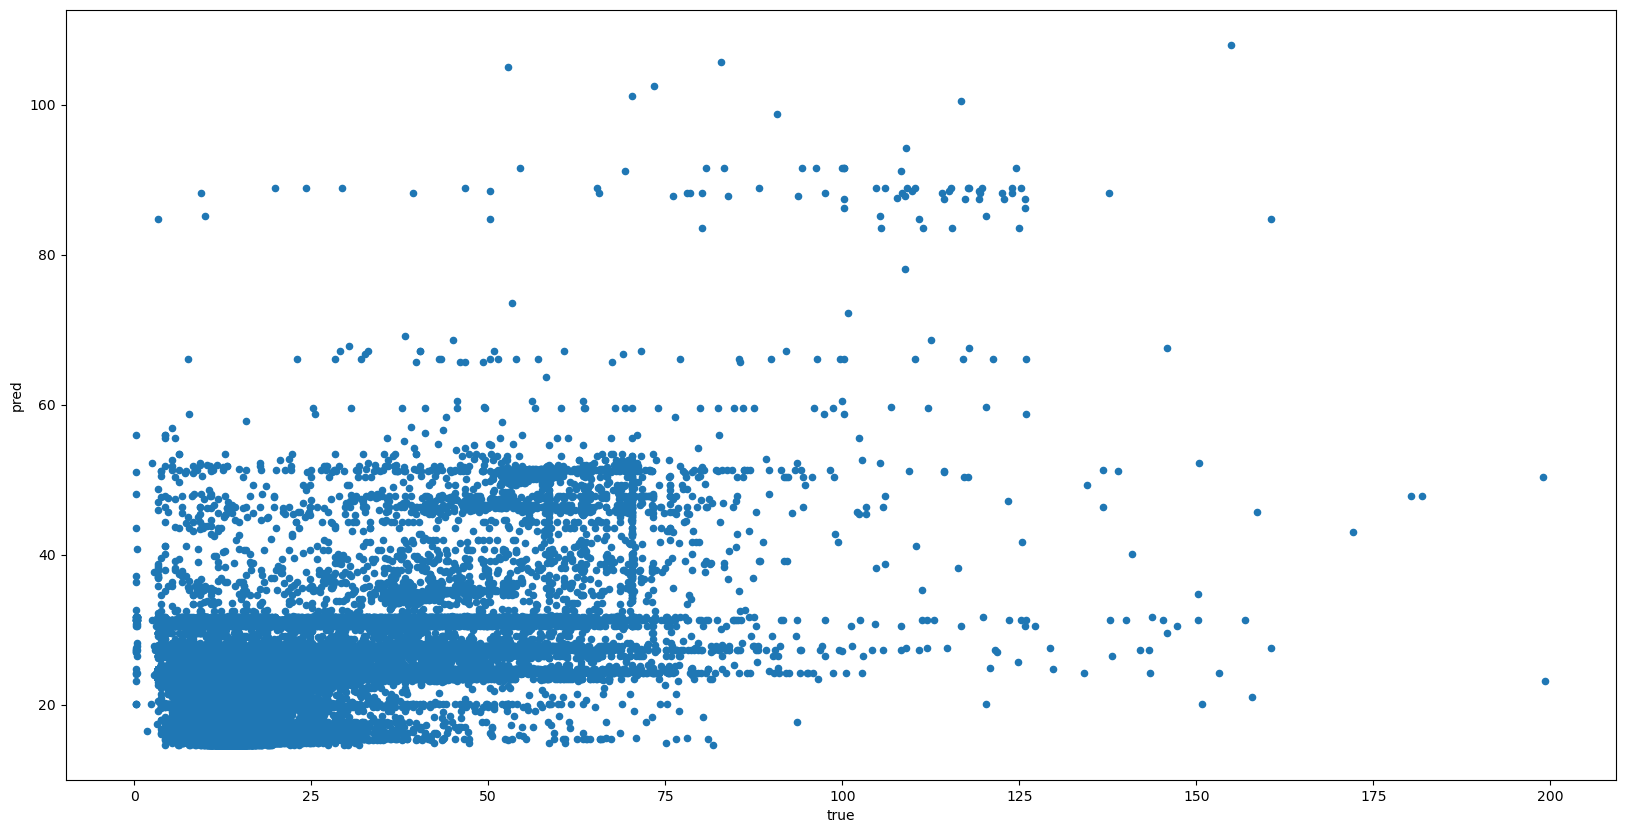

In [83]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

# Plotting a scatter plot to visualize the relationship between true values and predicted values
results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

<Axes: >

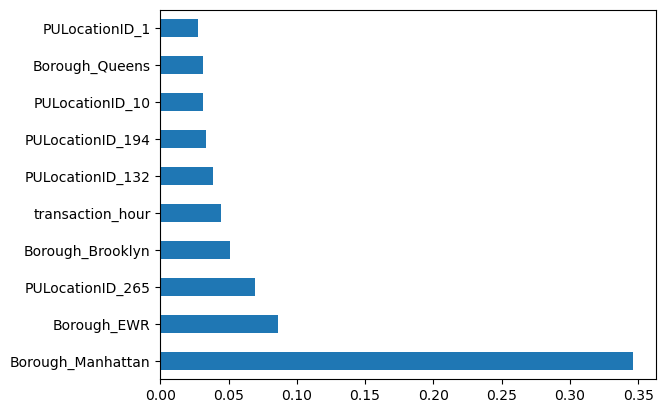

In [84]:
# Creating a Series from the feature importances of the trained model
(pd.Series(model_at_hand.feature_importances_, index=X_train.columns)
   .nlargest(10)
   .plot(kind='barh')) 

In [85]:
comparison = {
    "Algorithm": ["Benchmark model", "Decision tree", "Random forest", "Gradient boosting"],
    "MAE": [9.778, 8.534, 7.426, 8.388],
    "RMSE": [14.739, 14.011, 13.212, 13.378],
    "R2": [0.225, 0.308, 0.385, 0.369]
}

In [86]:
df = pd.DataFrame(comparison)

In [87]:
print(df)

           Algorithm    MAE    RMSE     R2
0    Benchmark model  9.778  14.739  0.225
1      Decision tree  8.534  14.011  0.308
2      Random forest  7.426  13.212  0.385
3  Gradient boosting  8.388  13.378  0.369


# 8. Tuning

# 8.1. Find best parameters

In [88]:
# Defining the hyperparameter grid for RandomizedSearchCV with a simplified set of options
random_grid = {
    'n_estimators': [200, 500],  # Fewer options
    'max_features': ['sqrt'],  # Only keep 'sqrt'
    'max_depth': [10, 20, 50],  # Reduce the range
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]  # Only consider True
}

import pprint as pp

pp.pprint(random_grid)


{'bootstrap': [True],
 'max_depth': [10, 20, 50],
 'max_features': ['sqrt'],
 'min_samples_leaf': [1, 2],
 'min_samples_split': [2, 5],
 'n_estimators': [200, 500]}


In [89]:
from sklearn.model_selection import RandomizedSearchCV

# Initializing a RandomForestRegressor instance
rf = RandomForestRegressor()

# Setting up RandomizedSearchCV to find the best hyperparameters for the RandomForestRegressor
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fitting the RandomizedSearchCV model to the training data
rf_random.fit(X_train, y_train)

# Creating a DataFrame from the results of the randomized search
performances = pd.DataFrame.from_dict(rf_random.cv_results_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [90]:
performances

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,33.415336,0.366639,1.701335,0.010209,200,2,1,sqrt,20,True,"{'n_estimators': 200, 'min_samples_split': 2, ...",0.369076,0.371308,0.376257,0.372214,0.003001,6
1,94.869002,0.921989,5.021668,0.173640,200,2,1,sqrt,50,True,"{'n_estimators': 200, 'min_samples_split': 2, ...",0.412318,0.412035,0.417337,0.413897,0.002436,3
2,13.504337,0.273313,0.752337,0.047938,200,2,1,sqrt,10,True,"{'n_estimators': 200, 'min_samples_split': 2, ...",0.279151,0.273760,0.283846,0.278919,0.004121,10
3,65.448669,0.775653,4.679002,0.101602,200,5,1,sqrt,50,True,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.429400,0.428584,0.436377,0.431454,0.003497,2
4,72.622661,0.853958,4.250668,0.038578,500,5,1,sqrt,20,True,"{'n_estimators': 500, 'min_samples_split': 5, ...",0.368948,0.371511,0.376723,0.372394,0.003235,5
5,88.912335,0.308242,4.240668,0.006946,500,2,1,sqrt,20,True,"{'n_estimators': 500, 'min_samples_split': 2, ...",0.369118,0.370490,0.374086,0.371232,0.002095,7
6,74.471004,0.973613,4.301999,0.079309,500,2,2,sqrt,20,True,"{'n_estimators': 500, 'min_samples_split': 2, ...",0.369937,0.371747,0.376300,0.372661,0.002677,4
7,35.232000,0.194825,1.800337,0.031171,500,2,1,sqrt,10,True,"{'n_estimators': 500, 'min_samples_split': 2, ...",0.279812,0.276684,0.280288,0.278928,0.001599,9
8,103.511351,1.194054,5.512997,0.036535,500,2,2,sqrt,50,True,"{'n_estimators': 500, 'min_samples_split': 2, ...",0.432252,0.434461,0.439335,0.435349,0.002959,1
9,28.214994,0.166986,1.277348,0.124560,500,2,2,sqrt,10,True,"{'n_estimators': 500, 'min_samples_split': 2, ...",0.280200,0.279749,0.283063,0.281004,0.001468,8


In [94]:
import time
# Start timing the model training process
t0= time.time()

# Initializing the RandomForestRegressor with specific hyperparameters
best = RandomForestRegressor(n_estimators=500,min_samples_split= 2,
min_samples_leaf= 2,
max_features= 'sqrt',
max_depth= 10,
bootstrap= True)

# Fitting the RandomForestRegressor model to the training data
best.fit(X_train, y_train)

# Calculate and print the time elapsed for training
t1 = time.time() - t0
print("Time elapsed: ", t1, " seconds")

# Assigning the trained model to a variable for further use
model_at_hand = best

# Making predictions on the test set
y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

# Evaluating the model's performance
print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

Time elapsed:  26.88622236251831  seconds
mean_absolute_error 9.877324008714494
mean_squared_error 208.01237208969422
root_mean_squared_error 14.422634020514222
r2 0.28112094222839823


In [95]:
from sklearn.ensemble import RandomForestRegressor

import time
# Start timing the model training process
t0= time.time()

# Initializing the RandomForestRegressor with specific hyperparameters
second_best = RandomForestRegressor(n_estimators=200,min_samples_split= 5,
min_samples_leaf= 1,
max_features= 'sqrt',
max_depth= 50,
bootstrap= True)

# Fitting the RandomForestRegressor model to the training data
second_best.fit(X_train, y_train)

# Calculate and print the time elapsed for training
t1 = time.time() - t0
print("Time elapsed: ", t1, " seconds")

# Assigning the trained model to a variable for further use
model_at_hand = second_best

# Making predictions on the test set
y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

# Evaluating the model's performance
print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

Time elapsed:  56.98470950126648  seconds
mean_absolute_error 7.587359828095494
mean_squared_error 164.07028516494827
root_mean_squared_error 12.808992355566001
r2 0.43298232300895156


C:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='true', ylabel='pred'>

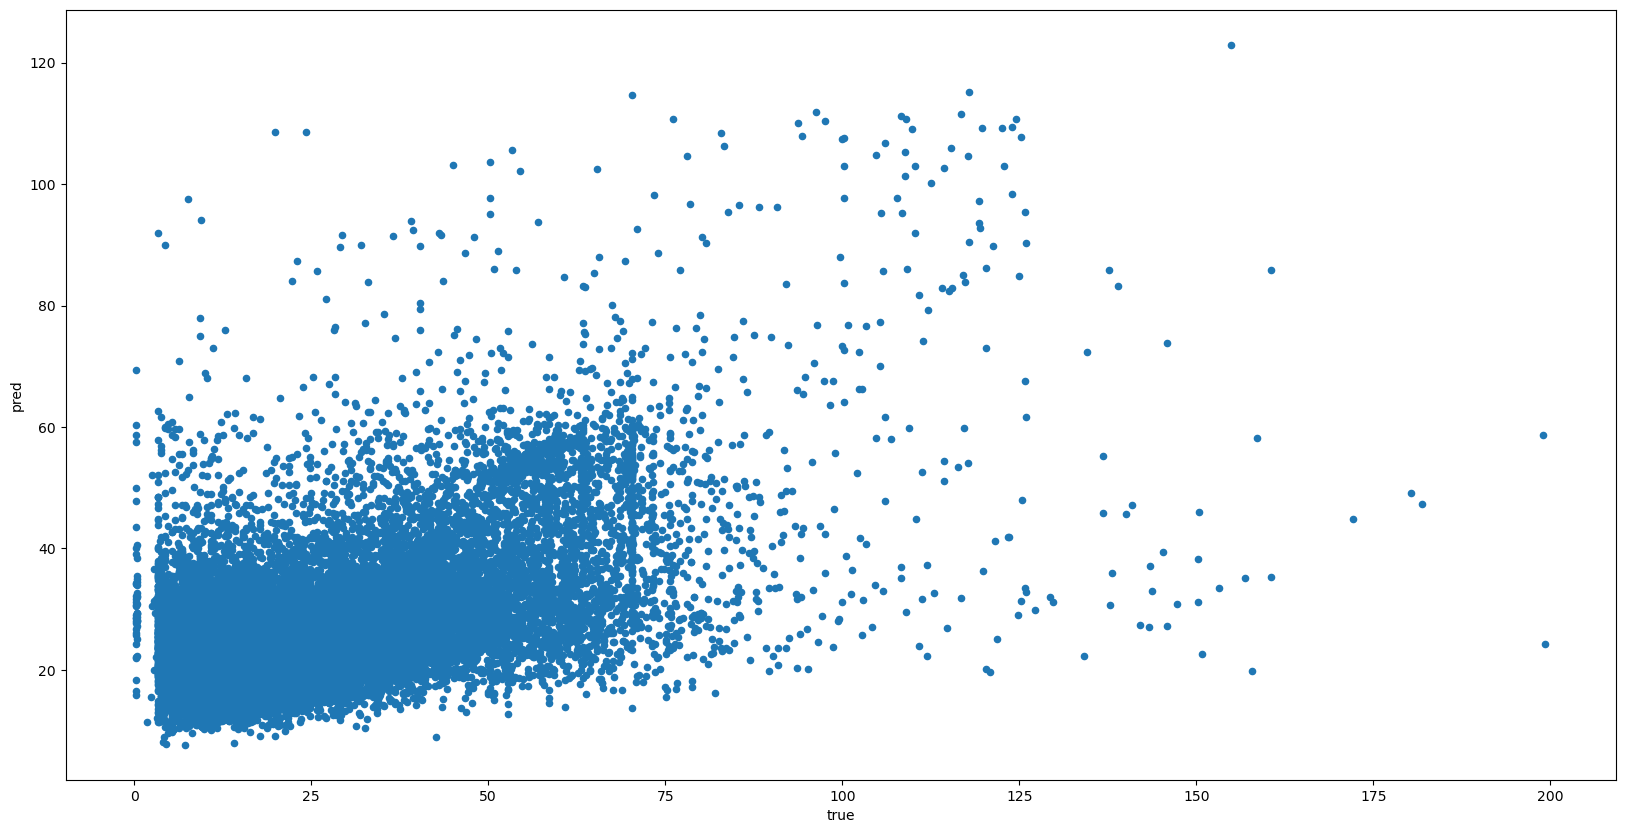

In [96]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

# Plotting a scatter plot to visualize the relationship between true values and predicted values
results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')